Start by importing the needed libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sns.set()

Read in the data with pandas

In [9]:
data = pd.read_csv("data/drivingTimes.csv")
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time
data.head()

,date,day_of_the_week,time,time_of_day,olney_secs,college_park_secs,olney_mins,college_park_mins,olney_hours,college_park_hours
0,11/13/2019,Thursday,06:00:00,Morning,2398,2405,39.966667,40.083333,0.666111,0.668056
1,11/13/2019,Thursday,06:20:00,Morning,2555,2689,42.583333,44.816667,0.709722,0.746944
2,11/13/2019,Thursday,06:40:00,Morning,2850,2774,47.500000,46.233333,0.791667,0.770556
3,11/13/2019,Thursday,07:00:00,Morning,3217,3217,53.616667,53.616667,0.893611,0.893611
4,11/13/2019,Thursday,07:20:00,Morning,3127,3167,52.116667,52.783333,0.868611,0.879722


## Commuting from Olney

Creating a dataset with just Olney time

In [10]:
data_olney = data.loc[:,["date", "day_of_the_week", 'time', 'time_of_day', 'olney_secs', 'olney_mins', 'olney_hours']]
data_olney.head()

,date,day_of_the_week,time,time_of_day,olney_secs,olney_mins,olney_hours
0,11/13/2019,Thursday,06:00:00,Morning,2398,39.966667,0.666111
1,11/13/2019,Thursday,06:20:00,Morning,2555,42.583333,0.709722
2,11/13/2019,Thursday,06:40:00,Morning,2850,47.500000,0.791667
3,11/13/2019,Thursday,07:00:00,Morning,3217,53.616667,0.893611
4,11/13/2019,Thursday,07:20:00,Morning,3127,52.116667,0.868611


### Average Times

**What is the average time communting from Olney?**

In [11]:
data_olney.loc[:,["olney_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins
time_of_day,
Evening,64.058333
Morning,49.330401


**What is the average time in the morning if I leave at 7?**

In [12]:
data_olney.loc[data_olney['time'] == datetime.strptime("7:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    48.924074
dtype: float64

**What is the average time in the evening if I leave at 4?**

In [13]:
data_olney.loc[data_olney['time'] == datetime.strptime("16:00:00","%H:%M:%S").time()].loc[:,["olney_mins"]].mean()

olney_mins    67.662963
dtype: float64

**What is the best time to go to work in the morning?**

In [14]:
avg_morning_time = data.loc[data_olney['time_of_day'] == "Morning"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_morning_time)
avg_morning_time.loc[avg_morning_time['olney_mins'].idxmin()]

,olney_mins
time,
06:00:00,39.527778
06:20:00,41.933333
06:40:00,44.451852
07:00:00,48.924074
07:20:00,52.066667
07:40:00,55.618519
08:00:00,56.583333
08:20:00,54.764815
08:40:00,52.183333


olney_mins    39.527778
Name: 06:00:00, dtype: float64

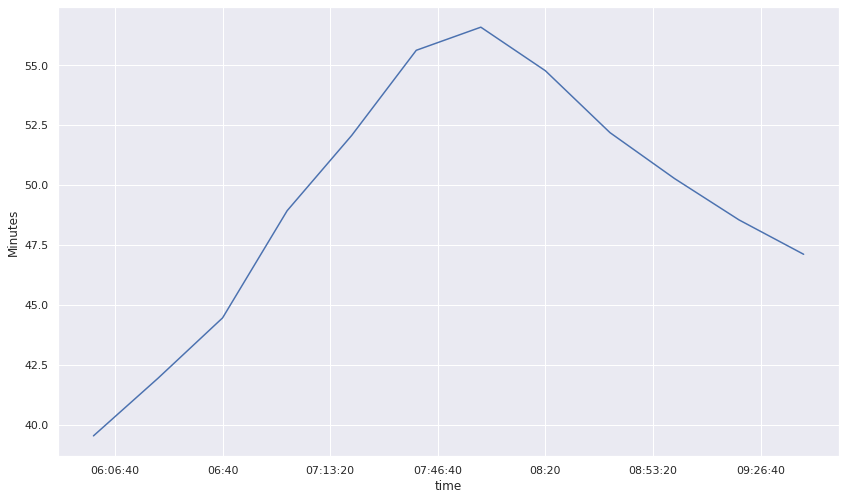

In [15]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_morning_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What is the best time to go home?**

In [16]:
avg_evening_time = data.loc[data_olney['time_of_day'] == "Evening"].loc[:,["olney_mins", 'time']].groupby('time').mean()
display(avg_evening_time)
avg_evening_time.loc[avg_evening_time['olney_mins'].idxmin()]

,olney_mins
time,
15:00:00,57.622222
15:20:00,61.114815
15:40:00,63.718519
16:00:00,67.662963
16:20:00,69.929630
16:40:00,71.129630
17:00:00,72.333333
17:20:00,73.083333
17:40:00,73.107407


olney_mins    47.377083
Name: 19:40:00, dtype: float64

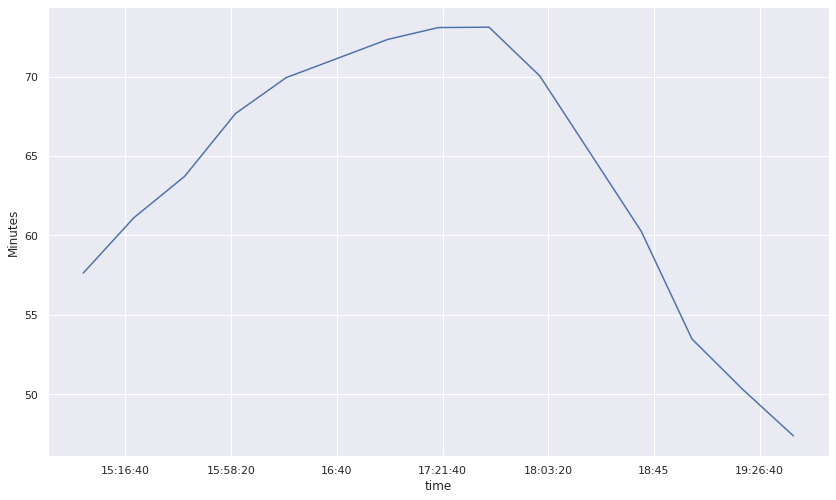

In [17]:
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=avg_evening_time.reset_index(), ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

### Comparing the days of the week

In [18]:
data_olney_dow = data_olney.loc[:,["olney_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean().reset_index()

**What are the averages for the morning?**

In [19]:
data_olney_dow_morning = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Morning"]
data_olney_dow_morning.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
5,Friday,53.707639
6,Monday,37.262500
7,Thursday,52.656250
8,Tuesday,50.504861
9,Wednesday,55.711111


**What is the quickest day of the week to get to work?**

In [20]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmin()]

time_of_day        Morning
day_of_the_week     Monday
olney_mins         37.2625
Name: 6, dtype: object

**What is the longest day of the week to go to work?**

In [21]:
data_olney_dow_morning.loc[data_olney_dow_morning['olney_mins'].idxmax()]

time_of_day          Morning
day_of_the_week    Wednesday
olney_mins           55.7111
Name: 9, dtype: object

Morning time comparision

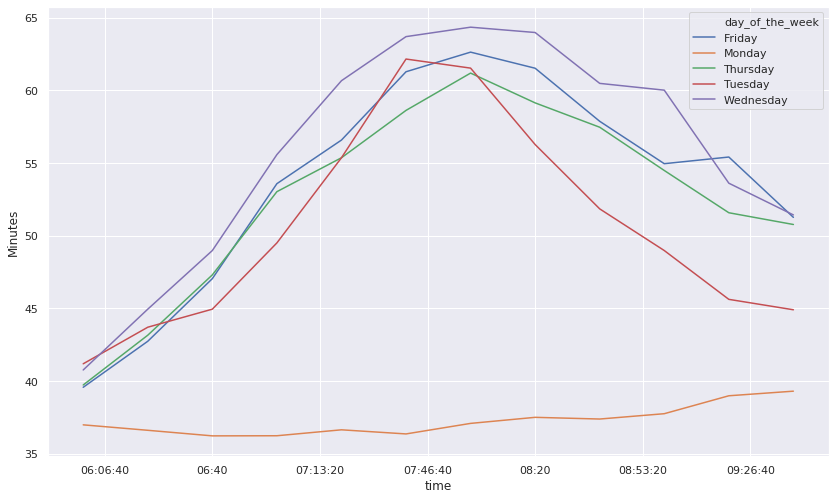

In [22]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Morning"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

**What are the averages for the evening?**

In [23]:
data_olney_dow_evening = data_olney_dow.loc[data_olney_dow['time_of_day'] == "Evening"]
data_olney_dow_evening.loc[:,["day_of_the_week", "olney_mins"]]

,day_of_the_week,olney_mins
0,Friday,70.352222
1,Monday,45.918333
2,Thursday,74.062222
3,Tuesday,62.710494
4,Wednesday,70.168889


**What is the quickest day of the week to get to home?**

In [24]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmin()]

time_of_day        Evening
day_of_the_week     Monday
olney_mins         45.9183
Name: 1, dtype: object

**What is the longest day of the week to go to home?**

In [25]:
data_olney_dow_evening.loc[data_olney_dow_evening['olney_mins'].idxmax()]

time_of_day         Evening
day_of_the_week    Thursday
olney_mins          74.0622
Name: 2, dtype: object

Evening time comparision

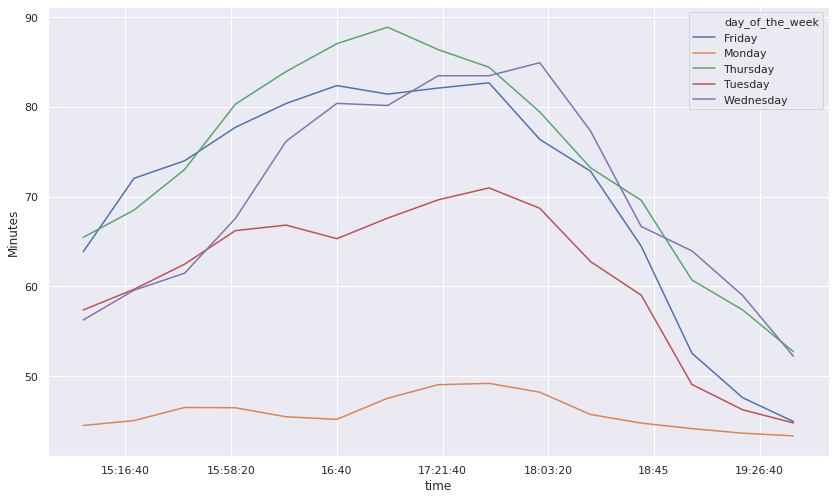

In [26]:
data_olney_morning = data_olney.loc[data_olney['time_of_day'] == "Evening"]
plot_data = data_olney_morning.groupby(['day_of_the_week', 'time']).mean().reset_index()
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='olney_mins', data=plot_data, hue="day_of_the_week", ax=ax1, sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

## Comparing the two

First, we will look at some overall averages

In [27]:
data.loc[:,["olney_mins", "college_park_mins", 'time_of_day']].groupby('time_of_day').mean()

,olney_mins,college_park_mins
time_of_day,,
Evening,64.058333,60.810985
Morning,49.330401,45.554321


The averages by the day of the week

In [28]:
day_week_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'day_of_the_week']].groupby(['time_of_day', 'day_of_the_week']).mean()
display(day_week_mean) 
day_week_mean = day_week_mean.reset_index()

olney_mins  college_park_mins
time_of_day day_of_the_week                               
Evening     Friday            70.352222          68.883333
            Monday            45.918333          37.672222
            Thursday          74.062222          71.815556
            Tuesday           62.710494          61.505556
            Wednesday         70.168889          67.684444
Morning     Friday            53.707639          50.611806
            Monday            37.262500          28.039583
            Thursday          52.656250          50.372222
            Tuesday           50.504861          49.490278
            Wednesday         55.711111          52.961111

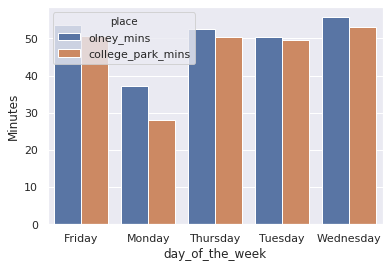

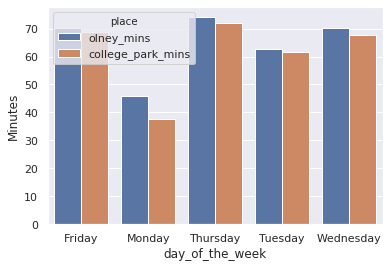

In [29]:
day_week_mean_morning = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_morning, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_week_mean_evening = pd.melt(day_week_mean.loc[day_week_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "day_of_the_week"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots()
g = sns.barplot(x='day_of_the_week', y='minutes', data=day_week_mean_evening, ax=ax1, hue="place")

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

The averages by time

In [30]:
day_time_mean = data.loc[:,["olney_mins", "college_park_mins", 'time_of_day', 'time']].groupby(['time_of_day', 'time']).mean()
display(day_time_mean) 
day_time_mean = day_time_mean.reset_index()

olney_mins  college_park_mins
time_of_day time                                   
Evening     15:00:00   57.622222          55.020370
            15:20:00   61.114815          60.364815
            15:40:00   63.718519          61.622222
            16:00:00   67.662963          64.805556
            16:20:00   69.929630          66.281481
            16:40:00   71.129630          66.974074
            17:00:00   72.333333          70.962963
            17:20:00   73.083333          72.442593
            17:40:00   73.107407          72.577778
            18:00:00   70.038889          68.012963
            18:20:00   65.153704          62.192593
            18:40:00   60.261111          58.062963
            19:00:00   53.479167          46.422917
            19:20:00   50.306250          41.791667
            19:40:00   47.377083          38.431250
Morning     06:00:00   39.527778          37.866667
            06:20:00   41.933333          40.442593
            06:40:00   44.451852          42.196296
            07:00:00   48.924074          45.340741
            07:20:00   52.066667          48.214815
            07:40:00   55.618519          48.129630
            08:00:00   56.583333          50.633333
            08:20:00   54.764815          49.311111
            08:40:00   52.183333          50.238889
            09:00:00   50.266667          48.696296
            09:20:00   48.538889          44.772222
            09:40:00   47.105556          40.809259

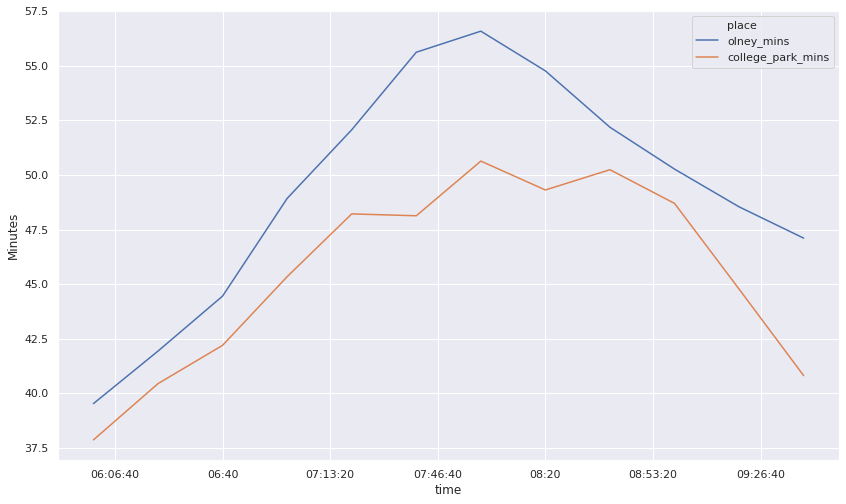

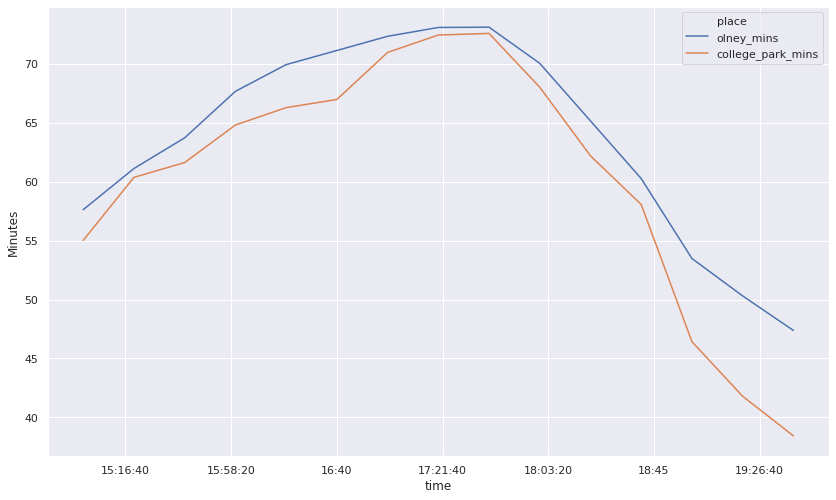

In [31]:
day_time_mean_morning = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Morning"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")

fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_morning, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()

day_time_mean_evening = pd.melt(day_time_mean.loc[day_time_mean['time_of_day'] == "Evening"], id_vars=['time_of_day', "time"], var_name="place", value_name="minutes")
fig, ax1 = plt.subplots(figsize=(14, 8.27))
g = sns.lineplot(x='time', y='minutes', data=day_time_mean_evening, ax=ax1, hue="place", sort=True)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Minutes')

plt.show()